Benjamin Lab

Diego Garcia

[GitHub](https://github.com/DiegoSchool/Data271_Final_Project)

 ## Introduction

In this exploratory data analysis we are examining the effect that different environmental conditions can have on the outcome of an MLB game. Some of the conditions we are looking at include elevation, temperature, wind speed, whether a game was played during the day or night, and the amount of precipitation that occured during the game. All games are from the 2024 MLB regular and post season games. We are going to attempt to answer questions like do players gain any kind of advantage depending on the stadium they play in? (https://www.youtube.com/watch?v=RaU2gpozGZs)

We have collected a few sets of data, one containing the elevation measurements for each stadium where an MLB game was played during the 2024 season and we will examine the difference in total runs scored in each game and see how they compare across different stadiums. One reason we are focusing on altitude is that there is a shared theory among player, coaches, and baseball fans alike that games played in higher altitudes like Denver, Colorado baseballs hit off the bat are able to travel farther due to the thinner, less dense air observed from higher elevations. (https://www.cbsnews.com/colorado/news/altitude-baseball-coors-field-denver-impact-thin-air/)

Another set of data that we collected has results from each individual game for the 2024 season. This dataset will provide us with the measurements that we will compare with different stadium elevations to see if there are any trends for specific locations. This dataset also includes information on weather conditions for each game during the 2024 MLB season.

By combining elevation data with game-specific statistics and weather conditions, we can isolate and analyze patterns that may be influenced by atmospheric variables. For example, by comparing games played at high-elevation stadiums like Coors Field in Denver with those at sea level, we can examine differences in home run rates, total runs scored, and pitching performance. Incorporating weather data such as temperature, humidity, and wind speed allows us to assess whether certain environmental conditions correlate with game outcomes or favor specific teams. This integrated approach enables us to better understand the role of elevation and weather in shaping competitive dynamics and player performance.

This topic is very special to myself in particular because I have always had a passion for sports since I was very young and topics like these are the main motivation for me to get into the field of data science. Once I was aware of this growing industry of data analytics being used in sports I thought it would be a perfect blend of my love for sports and my interest in numbers and statistics.

This analysis provides valuable insights by pinpointing the environmental factors such as elevation and weather that could significantly influence game outcomes. For consumers like team strategists, sports analysts, bettors, and even fans, understanding these influences can inform strategy and training. Teams can adjust training and in-game strategies based on how players perform under specific conditions, optimizing roster decisions and game plans. This information could also enhance game predictions. Analysts and bettors can incorporate these environmental variables into predictive models, leading to more accurate forecasts of game outcomes.

## Libraries Required

- **Pandas** will be necessary for cleaning and analyzing data more easily

- **Numpy** will be used to perform artimetic on the data.

- **Matplotlib, Seaborn & Plotly.Express** will be used to vizualize interesting patterns in the data

- **Regex** will be used to convert different values for dates and time to the same pattern in order to join datasets

- **Requests** will be used to pull data from an elevation API

- **BeautifulSoup & Json** will be used to take html text objects from webscraping and convert them into more managable pandas dataframes

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import requests
from bs4 import BeautifulSoup
from pandas import json_normalize
import json

## Data Preparation

[Source](https://www.kaggle.com/datasets/garethflandro/major-league-baseball-games-2024)

This dataset includes stats for each MLB game during the year 2024. I can't find a date
when it was uploaded to kaggle but it has to have been after the completion of
the 2024 mlb season which was in october

In [90]:
mlb = pd.read_csv('Data/MLB2020-2024GameInfo.csv')
mlb.shape

(10616, 162)

Here I want to look more closely at the columns in this dataset and see which ones will be of best use for us in our analysis

In [91]:
mlb.head()

,Date,Game Number,Day of Week,VT,VT League,VT Game Number,HT,HT League,HT Game Number,VT Score,...,HT Starting Player 7 Name,HT Starting Player 7 Defensive Position,HT Starting Player 8 ID,HT Starting Player 8 Name,HT Starting Player 8 Defensive Position,HT Starting Player 9 ID,HT Starting Player 9 Name,HT Starting Player 9 Defensive Position,Game Notes,Complete Record
0,20240320,0,Wed,LAN,NL,1,SDN,NL,1,5,...,Luis Campusano,2,wadet002,Tyler Wade,5,merrj002,Jackson Merrill,8,NaN,Y
1,20240321,0,Thu,SDN,NL,2,LAN,NL,2,15,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y
2,20240328,0,Thu,COL,NL,1,ARI,NL,1,1,...,Blaze Alexander,10,thoma004,Alek Thomas,8,perdg001,Gerardo Perdomo,6,NaN,Y
3,20240328,0,Thu,WAS,NL,1,CIN,NL,1,2,...,Spencer Steer,7,martn003,Nick Martini,10,stept001,Tyler Stephenson,2,NaN,Y
4,20240328,0,Thu,SLN,NL,1,LAN,NL,3,1,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y


After looking at the columns carefully we are going to select only a fraction of the columns from our dataset. Many of the columns we are leaving out are player specific data or information about the umpires that we are not focusing on in this analysis.

In [92]:
mlb_stats = mlb[['Date', 'Park ID', 'VT At-Bats', 'VT Hits', 'VT Doubles', 'VT Triples',
                       'VT Home Runs','HT At-Bats', 'HT Hits', 'HT Doubles', 'HT Triples',
                         'HT Home Runs' ]]
mlb_stats.head()

,Date,Park ID,VT At-Bats,VT Hits,VT Doubles,VT Triples,VT Home Runs,HT At-Bats,HT Hits,HT Doubles,HT Triples,HT Home Runs
0,20240320,SEO01,33,7,0,0,0,30,4,0,0,0
1,20240321,SEO01,43,18,3,1,1,42,16,3,0,1
2,20240328,PHO01,30,4,2,0,0,40,18,3,0,1
3,20240328,CIN09,32,6,0,0,1,34,10,3,0,2
4,20240328,LOS03,31,3,0,0,1,31,10,2,0,2


The Park ID column contains unique codes that were created by the authors of the dataset. They have a three letter abbreviation for the city where the park is located and a two diget number to distinguish between parks within the same city. Other columns from this dataset that we are using are labeled with an abbreviation of VT for Visiting Team, and HT for Home Team, which is then followed by the stat that is measured for each column.

Next we are going to check the data types of our dataframe to make sure that they are appropriate

In [93]:
mlb_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          10616 non-null  int64 
 1   Park ID       10616 non-null  object
 2   VT At-Bats    10616 non-null  int64 
 3   VT Hits       10616 non-null  int64 
 4   VT Doubles    10616 non-null  int64 
 5   VT Triples    10616 non-null  int64 
 6   VT Home Runs  10616 non-null  int64 
 7   HT At-Bats    10616 non-null  int64 
 8   HT Hits       10616 non-null  int64 
 9   HT Doubles    10616 non-null  int64 
 10  HT Triples    10616 non-null  int64 
 11  HT Home Runs  10616 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 995.4+ KB


Most of the data looks like they have appropriate types. We will change the date from int to a pandas datetime type however to more easily manipulate the data in later sections.

In [94]:
mlb_stats['Date'] = pd.to_datetime(mlb_stats['Date'].astype(str), format='%Y%m%d')

/var/folders/pm/9vt22q8n1492gdz77qj4fnm00000gp/T/ipykernel_44536/3579300257.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now this dataset also has game data dating back to the 2020 season so next we are going to select only rows that contain data from the 2024 season since that is our main focus of our analysis

In [95]:
mlb_stats_2024 = mlb_stats[mlb_stats['Date'].dt.year == 2024]
mlb_stats_2024.tail()

,Date,Park ID,VT At-Bats,VT Hits,VT Doubles,VT Triples,VT Home Runs,HT At-Bats,HT Hits,HT Doubles,HT Triples,HT Home Runs
2424,2024-09-29,NYC21,30,5,3,0,0,26,5,2,0,1
2425,2024-09-29,SEA03,34,7,3,0,0,32,9,3,0,1
2426,2024-09-29,TOR02,35,9,1,0,0,31,4,1,0,0
2427,2024-09-30,ATL03,37,11,2,0,2,38,12,1,0,2
2428,2024-09-30,ATL03,29,3,0,0,0,29,6,2,0,0


In [96]:
# Summary Statistics

mlb_stats_2024.describe().round(2)

,Date,VT At-Bats,VT Hits,VT Doubles,VT Triples,VT Home Runs,HT At-Bats,HT Hits,HT Doubles,HT Triples,HT Home Runs
count,2429,2429.00,2429.00,2429.00,2429.00,2429.00,2429.00,2429.00,2429.00,2429.00,2429.00
mean,2024-06-28 10:15:21.860847872,34.58,8.37,1.62,0.14,1.12,32.81,8.02,1.58,0.14,1.13
min,2024-03-20 00:00:00,17.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00
25%,2024-05-12 00:00:00,32.00,6.00,1.00,0.00,0.00,30.00,6.00,1.00,0.00,0.00
50%,2024-06-27 00:00:00,34.00,8.00,1.00,0.00,1.00,33.00,8.00,1.00,0.00,1.00
75%,2024-08-15 00:00:00,37.00,11.00,2.00,0.00,2.00,35.00,10.00,2.00,0.00,2.00
max,2024-09-30 00:00:00,51.00,24.00,9.00,3.00,8.00,49.00,24.00,10.00,2.00,7.00
std,NaN,3.77,3.54,1.39,0.38,1.10,3.40,3.22,1.35,0.39,1.10


Some useful insights gained from these statistics are the average numbers of at bats and hits for all teams over the course of a season. We can use these when comparing games that were played at certain stadiums.

[Source](https://www.retrosheet.org/downloads/othercsvs.html)

Data was uploaded on 12/3/24

This dataset contains some information about the results of games for the 2024 MLB season as well as information about the environmental factors of each game. This is where we will pull most of our data concerining external factors that might affect a games outcome.

In [97]:
weather = pd.read_csv('Data/2024gameinfo.csv')

In [98]:
weather.columns

Index(['gid', 'visteam', 'hometeam', 'site', 'date', 'number', 'starttime',
       'daynight', 'innings', 'tiebreaker', 'usedh', 'htbf', 'timeofgame',
       'attendance', 'fieldcond', 'precip', 'sky', 'temp', 'winddir',
       'windspeed', 'oscorer', 'forfeit', 'suspend', 'umphome', 'ump1b',
       'ump2b', 'ump3b', 'umplf', 'umprf', 'wp', 'lp', 'save', 'gametype',
       'vruns', 'hruns', 'wteam', 'lteam', 'line', 'batteries', 'lineups',
       'box', 'pbp', 'season'],
      dtype='object')

Much like our first data set there are many columns that are not relevant to our analysis so in the next steps we will select only the necessary columns.

In [99]:
weather_relevant = weather.drop(['starttime', 'tiebreaker', 'usedh', 'forfeit',
                                  'umphome', 'ump1b','ump2b', 'ump3b', 'umplf',
                                  'umprf', 'wp', 'lp', 'save', 'htbf', 'timeofgame',
                                  'batteries', 'lineups', 'box', 'pbp', 'suspend',
                                  'season', 'gid', 'innings', 'number', 'line', 'attendance',
                                  'wteam', 'lteam', 'fieldcond', 'oscorer', 'gametype'], axis = 1)

Next I want to change the column label of site to Park ID to keep it consistent with the other dataset. I would like to change all the column labels so that they are cosistent with the same format if time permits but for now I will have to leave them as they are

In [100]:
weather_relevant.rename(columns={'site': 'Park ID'}, inplace=True)
weather_relevant

,visteam,hometeam,Park ID,date,daynight,precip,sky,temp,winddir,windspeed,vruns,hruns
0,LAN,SDN,SEO01,20240320,night,none,dome,72,unknown,0,5,2
1,SDN,LAN,SEO01,20240321,night,none,dome,72,unknown,0,15,11
2,COL,ARI,PHO01,20240328,night,none,overcast,73,unknown,2,1,16
3,ANA,BAL,BAL12,20240328,day,none,cloudy,54,fromlf,9,3,11
4,DET,CHA,CHI12,20240328,day,none,cloudy,50,tolf,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2468,NYA,LAN,LOS03,20241025,night,none,sunny,76,rtol,5,3,6
2469,NYA,LAN,LOS03,20241026,night,none,cloudy,77,ltor,5,2,4
2470,LAN,NYA,NYC21,20241028,night,none,sunny,52,fromlf,5,4,2
2471,LAN,NYA,NYC21,20241029,night,none,cloudy,61,rtol,10,4,11


Columns are as follows:
- visteam: Three letter abreviation of the visiting team for each game

- hometeam: Three letter abreviation of the home team for each game

- Park ID: same as variable from kaggle dataset explained above

- precip: categorical variable that describes a general level of precipitation for the game with values of, 'none', 'drizzle', 'rain', and 'unkown'

- sky: categorical variable describing the sky conditions of the game played

- winddir: categorical variable describing the wind direction for the game. Values indicate direction by stating whether the wind is coming from a section of the field toward home plate or another section of field or to a section of the field from home plate.

- vruns: runs scored by visiting team

- hruns: runs scored by home team

In [101]:
weather_relevant.head()

,visteam,hometeam,Park ID,date,daynight,precip,sky,temp,winddir,windspeed,vruns,hruns
0,LAN,SDN,SEO01,20240320,night,none,dome,72,unknown,0,5,2
1,SDN,LAN,SEO01,20240321,night,none,dome,72,unknown,0,15,11
2,COL,ARI,PHO01,20240328,night,none,overcast,73,unknown,2,1,16
3,ANA,BAL,BAL12,20240328,day,none,cloudy,54,fromlf,9,3,11
4,DET,CHA,CHI12,20240328,day,none,cloudy,50,tolf,14,1,0


In [102]:
# Summary statistics

weather_relevant.describe().round(2)

,date,temp,windspeed,vruns,hruns
count,2473.00,2473.00,2473.00,2473.00,2473.00
mean,20240662.80,73.34,6.70,4.41,4.37
std,180.73,10.13,4.77,3.15,3.01
min,20240320.00,0.00,0.00,0.00,0.00
25%,20240513.00,68.00,3.00,2.00,2.00
50%,20240629.00,74.00,7.00,4.00,4.00
75%,20240818.00,80.00,10.00,6.00,6.00
max,20241030.00,103.00,26.00,20.00,20.00


Here we can use some of these statistics to look at how average temperature or windspeed affect games


Next we will grab our final data set that includes elevation data for each stadium. We are going to use web scraping to pull a table from [Baseball Savant](https://baseballsavant.mlb.com/leaderboard/statcast-park-factors?type=distance&year=2024&batSide=&stat=index_wOBA&condition=All&rolling=3&parks=mlb) that has the relavant information

In [103]:
baseball_savant = requests.get('https://baseballsavant.mlb.com/leaderboard/statcast-park-factors?type=distance&year=2024&batSide=&stat=index_wOBA&condition=All&rolling=3&parks=mlb')

Now we'll check to make sure that the page was loaded successfully

In [104]:
baseball_savant

<Response [200]>

200 is the response we want and it means that the page was loaded successfully

Now we will translate the resonse into a text that contains the html code for the site. After converting the response to text we will use the BeautifulSoup method to parse through the text and grab the table we are looking for.

In [105]:
baseball_savant_text = baseball_savant.text

In [106]:
soup = BeautifulSoup(baseball_savant_text)

Now that we have our text sorted we can look for our table

Because the table on the site is stored as a java script variable it was a little tricker to retrieve than a normal table but these were the steps we took to retrieve it

In this first part we are looking for a script object that contains the text 'var data =' which was found upon inspection of the html text and webpage using the inspect tool also

In [107]:
script_tag = soup.find('script', text=re.compile('var data ='))
script_content = script_tag.string

/var/folders/pm/9vt22q8n1492gdz77qj4fnm00000gp/T/ipykernel_44536/1226957470.py:1: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.



Next we extract the json part with another regex pattern

In [108]:
json_text = re.search(r'var data = (\[.*?\]);' , script_content).group(1)

Now we take the text and convert it to a json format

In [109]:
data = json.loads(json_text)

Now finally we can convert the json into a pandas df

In [110]:
baseball_savant_table = pd.DataFrame(data)

We're going to clean this dataframe a bit as well because we are only looking at this data for it's elevation measurments

In [111]:
baseball_savant_table_cleaned = baseball_savant_table[['venue_name','elevation_feet']]
baseball_savant_table_cleaned.head()

,venue_name,elevation_feet
0,Oracle Park,0
1,Oakland Coliseum,3
2,T-Mobile Park,10
3,loanDepot park,10
4,Citi Field,10


The table is almost ready for analysis. We are only missing elevation data for 5 stadiums where games were played that were not normal stadiums more neutral site fields for special circumstances

Using the [Open-Elevation API](https://open-elevation.com/), a free open source elevation API, we can find the precise elevation measurements for our missing stadiums using their latitude and longitudes

In [112]:
elevations = requests.get('https://api.open-elevation.com/api/v1/lookup?locations=37.49811648014713,'
                     '126.86695990262396|19.403623852418008, -99.08533451111214|'
                     '33.50239299802912, -86.85599604894975|'
                     '41.2421914268545, -77.0472316775007|'
                     '51.53862108628318, -0.016491888689209214|').json()

In [113]:
# Turning the json payload into a df

elevations_df = json_normalize(elevations, record_path = 'results')
elevations_df

,elevation,longitude,latitude
0,14.0,126.866960,37.498116
1,2238.0,-99.085335,19.403624
2,170.0,-86.855996,33.502393
3,158.0,-77.047232,41.242191
4,14.0,-0.016492,51.538621


In [114]:
# Adding column with more identifiable venue names

elevations_df['venue_name'] = ['Gocheok Sky Dome', 'Estadio Alfredo Harp Helú', 'Rickwood Field', 'Bowman Field', 'London Stadium']

The elevation measurements are recored in meters so we will have to convert it to feet to keep our measurments consistent

In [115]:
elevations_df['elevation_feet'] = round((elevations_df['elevation'] * 3.281), 0).astype(int)

Now we can clean this dataframe down to only the relavant information

In [116]:
elevations_df_clean = elevations_df[['venue_name', 'elevation_feet']]

Lastly we will add the extra elevation data to our existing elevation table from baseball savant

In [117]:
all_elevations_df = pd.concat([baseball_savant_table_cleaned, elevations_df_clean], ignore_index=True)
all_elevations_df.head()

,venue_name,elevation_feet
0,Oracle Park,0
1,Oakland Coliseum,3
2,T-Mobile Park,10
3,loanDepot park,10
4,Citi Field,10


In [118]:
# Changing elevation measurements from type object to tyep int

all_elevations_df['elevation_feet'] = all_elevations_df['elevation_feet'].astype(int)

In [119]:
# Summary Statistics

all_elevations_df.describe().round(2)

,elevation_feet
count,35.00
mean,686.71
std,1456.60
min,0.00
25%,28.00
50%,460.00
75%,598.50
max,7343.00


## Exploratory Data Analysis

I am excited to get to some analysis with the elevation data so that will be the first thing we will explore.

First I will need to combine our datasets for elevation with our datasets that contain the team statistics. I will do that by creating a dictionary of the site values that need to be mapped to the name of their corresponding stadium.

In [120]:
park_id_to_venue = {
    'SEO01': 'Gocheok Sky Dome',
    'PHO01': 'Chase Field',
    'BAL12': 'Oriole Park at Camden Yards',
    'CHI12': 'Rate Field',
    'CIN09': 'Great American Ball Park',
    'HOU03': 'Daikin Park',
    'KAN06': 'Kauffman Stadium',
    'LOS03': 'Dodger Stadium',
    'MIA02': 'loanDepot park',
    'OAK01': 'Oakland Coliseum',
    'SAN02': 'Petco Park',
    'SEA03': 'T-Mobile Park',
    'STP01': 'Tropicana Field',
    'ARL03': 'Globe Life Field',
    'NYC21': 'Yankee Stadium',
    'PHI13': 'Citizens Bank Park',
    'CHI11': 'Wrigley Field',
    'WAS11': 'Nationals Park',
    'MIL06': 'American Family Field',
    'MIN04': 'Target Field',
    'STL10': 'Busch Stadium',
    'ANA01': 'Angel Stadium',
    'ATL03': 'Truist Park',
    'DEN02': 'Coors Field',
    'DET05': 'Comerica Park',
    'NYC20': 'Citi Field',
    'PIT08': 'PNC Park',
    'SFO03': 'Oracle Park',
    'CLE08': 'Progressive Field',
    'TOR02': 'Rogers Centre',
    'BOS07': 'Fenway Park',
    'MEX02': 'Estadio Alfredo Harp Helú',
    'LON01': 'London Stadium',
    'BIR01': 'Rickwood Field',
    'WIL02': 'Bowman Field'
}


In [121]:
mlb_stats_2024['venue_name'] = mlb_stats_2024['Park ID'].map(park_id_to_venue)
mlb_stats_2024.head()

/var/folders/pm/9vt22q8n1492gdz77qj4fnm00000gp/T/ipykernel_44536/4072844890.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Park ID,VT At-Bats,VT Hits,VT Doubles,VT Triples,VT Home Runs,HT At-Bats,HT Hits,HT Doubles,HT Triples,HT Home Runs,venue_name
0,2024-03-20,SEO01,33,7,0,0,0,30,4,0,0,0,Gocheok Sky Dome
1,2024-03-21,SEO01,43,18,3,1,1,42,16,3,0,1,Gocheok Sky Dome
2,2024-03-28,PHO01,30,4,2,0,0,40,18,3,0,1,Chase Field
3,2024-03-28,CIN09,32,6,0,0,1,34,10,3,0,2,Great American Ball Park
4,2024-03-28,LOS03,31,3,0,0,1,31,10,2,0,2,Dodger Stadium


Now I want to look at the total home runs hit across all MLB stadiums so I will add the two columns VT Home Runs and HT Home Runs together to create a total home run column for each game

In [122]:
mlb_stats_2024['Total Home Runs'] = mlb_stats_2024['VT Home Runs'] + mlb_stats_2024['HT Home Runs']

/var/folders/pm/9vt22q8n1492gdz77qj4fnm00000gp/T/ipykernel_44536/593010731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now that we have the total home runs hit for each game we will take the sum of all home runs hit grouped by stadium to see how the totals vary across each park

In [123]:
home_runs_by_stadium = mlb_stats_2024.groupby('venue_name')['Total Home Runs'].sum().reset_index()
home_runs_by_stadium.head()

,venue_name,Total Home Runs
0,American Family Field,197
1,Angel Stadium,197
2,Bowman Field,0
3,Busch Stadium,148
4,Chase Field,180


Now we just have to add the elevation data to our new table. We are going to do this by merging the elevation_feet column from our existing all_elevations_df table to the new home_runs_by_stadium table. Because the two venue_name columns are identical we don't have to specify what type of join. 

In [124]:
home_runs_by_stadium = pd.merge(home_runs_by_stadium, all_elevations_df[['venue_name', 'elevation_feet']],
                  on='venue_name')

home_runs_by_stadium.head()

,venue_name,Total Home Runs,elevation_feet
0,American Family Field,197,597
1,Angel Stadium,197,151
2,Bowman Field,0,518
3,Busch Stadium,148,460
4,Chase Field,180,1086


Now we will construct our visualization of the total home runs hit across each MLB stadium while looking at their elevation levels to see if there is any patterns that can be drawn from higher or lower elevation stadiums.

In [125]:
# Sorting the table by home runs so it is easier to see stadiums with most home runs to the fewest

home_runs_by_stadium = home_runs_by_stadium.sort_values('Total Home Runs', ascending=True)

fig = px.bar(
    home_runs_by_stadium,
    x='Total Home Runs',
    y='venue_name',
    color='elevation_feet',  # Map elevation to color
    color_continuous_scale='RdYlGn',  # Red to Green gradient
    range_color=[0,1500], # Range is smaller than actual range to show more variation between stadiums
    title='Total Home Runs by Stadium with Elevation Mapping',
    labels={'venue_name': 'Stadium', 'Total Home Runs': 'Home Runs', 'elevation_feet': 'Elevation (ft)'},
    height=600
)

# Update layout for better readability
fig.update_layout(
    title_font_size=20,
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=10
)

# Display the interactive plot
fig.show()

From the plot we generated alone we weren't able to see that elevation had an effect on the number of home runs hit. While Coors Field did rank toward the top of home run chart, there were eight other parks that had higher home run totals all with varying elevation levels. Yankee stadium having the highest home run totals and being one of the lowest elevations in the MLB standing at only 55 feet above sea level.

There are also stadiums with higher elevations like Truist Park in Atlanta that had the second highest elevation among regular MLB stadiums ranking toward the bottom of the group in terms of total home runs hit.

Next I want to see how some of the environmental factors can affect the performance of teams. To do that I want to create a heat map looking at the interaction between wind speed and precipitation vs total runs scored.

In order to create this visualization one change we will need to make is adding visiting team and home team runs together to look at total runs scored in each game.

In [126]:
weather_relevant['total runs'] = weather_relevant['vruns'] + weather_relevant['hruns']
weather_relevant.head()

,visteam,hometeam,Park ID,date,daynight,precip,sky,temp,winddir,windspeed,vruns,hruns,total runs
0,LAN,SDN,SEO01,20240320,night,none,dome,72,unknown,0,5,2,7
1,SDN,LAN,SEO01,20240321,night,none,dome,72,unknown,0,15,11,26
2,COL,ARI,PHO01,20240328,night,none,overcast,73,unknown,2,1,16,17
3,ANA,BAL,BAL12,20240328,day,none,cloudy,54,fromlf,9,3,11,14
4,DET,CHA,CHI12,20240328,day,none,cloudy,50,tolf,14,1,0,1


Next we want to create bins for our wind speed data that will work as our x axis. The code below will create a new column called wind_bin that will categorize each game into its appropriate bin based on the wind speed observed for the game.

In [127]:
weather_relevant['wind_bin'] = pd.cut(weather_relevant['windspeed'], bins=np.arange(0, 26, 2), right=False)

# Converts interval objects from pd.cut to strings that work with plotly
weather_relevant['wind_bin'] = weather_relevant['wind_bin'].apply(lambda x: f"{x.left}-{x.right} mph")


Now all that is left is to create the heatmap

In [128]:
# Calculating average total runs for each wind-precipitation combination
heatmap_data = weather_relevant.groupby(['wind_bin', 'precip'])['total runs'].mean().reset_index()
heatmap_data.columns = ['Wind Speed (mph)', 'Precipitation', 'Average Runs']

# Creating an order for the precipitation that is most logical
precip_order = ['unknown', 'rain', 'drizzle', 'none']

# Creating the interactive heatmap
fig = px.density_heatmap(
    heatmap_data, 
    x='Wind Speed (mph)', 
    y='Precipitation', 
    z='Average Runs', 
    color_continuous_scale='RdYlGn',
    title='Heatmap of Average Total Runs Scored by Wind Speed and Precipitation',
    category_orders={"Precipitation": precip_order}
)

fig.show()

/var/folders/pm/9vt22q8n1492gdz77qj4fnm00000gp/T/ipykernel_44536/1419905470.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The results from the heatmap do not seem to show any significant trend for wind speed or precipitation affecting runs scored. Looking at wind speed alone there does seem to be a slight decline in average runs scored once winds get above 20 mph. Baseball games are usally intended to be played in ideal conditions and games get cancelled on account of rain regularly, for that reason we do not have a lot of data where there is a combination of strong winds and rain.

**Here we are visualizng the difference between average runs scored per game between Day and Night games.**

As you can see, there is a small but clear difference between the average homeruns scored during day games and night games. It seems that on average, teams are more likely to hit homeruns during night games. Also displayed is the difference between home teams and visiting teams, and it looks like there is an even wider difference for visiting teams than home teams, visiting teams being much more likely to hit more homeruns during night games than day games.

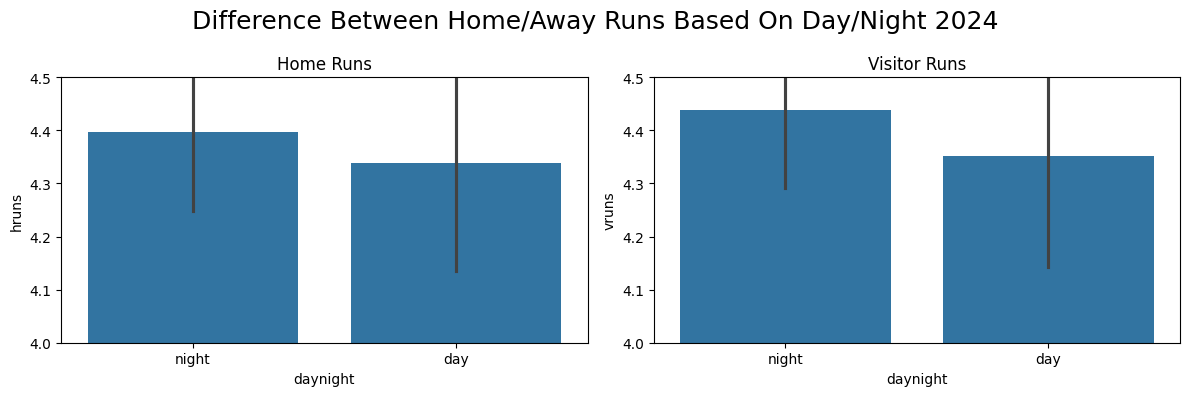

In [129]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.barplot(data = weather_relevant, y = "hruns", x = "daynight", ax = ax[0])
sns.barplot(data = weather_relevant, y = "vruns", x = "daynight", ax = ax[1])
ax[0].set_ylim(4, 4.5)
ax[1].set_ylim(4, 4.5)
plt.suptitle("Difference Between Home/Away Runs Based On Day/Night 2024", size = 18)
ax[0].set_title("Home Runs")
ax[1].set_title("Visitor Runs")
plt.tight_layout()


**Here we are visualizing the difference in the average total runs for different rainy weather conditions**

We used the original dataset to find whether or not there was a visable difference between homeruns hit on rainy days vs. clear days, and we found that there was a clear difference. It appeared that there were on average more homeruns hit on rainy days than clear days. But we realized that could be due to there being far less rainy days in the dataset than clear days. So we decided to filter down to one stadium that we know has a much more even distribution of rainy and clear days, New York. And to our suprise, with this dataset there were on average more runs scored on clear days than rainy days. 

In [130]:
NY_percip = weather_relevant[weather_relevant['Park ID'] == "NYC21"]
NY_percip.head()

,visteam,hometeam,Park ID,date,daynight,precip,sky,temp,winddir,windspeed,vruns,hruns,total runs,wind_bin
109,TOR,NYA,NYC21,20240405,day,none,cloudy,46,tolf,16,3,0,3,16-18 mph
123,TOR,NYA,NYC21,20240406,night,none,cloudy,50,ltor,13,8,9,17,12-14 mph
137,TOR,NYA,NYC21,20240407,day,none,cloudy,52,fromlf,11,3,8,11,10-12 mph
149,MIA,NYA,NYC21,20240408,night,none,overcast,60,tolf,7,0,7,7,6-8 mph
164,MIA,NYA,NYC21,20240409,night,none,cloudy,65,rtol,8,2,3,5,8-10 mph


Text(0.5, 1.0, 'Difference In Total Runs By Percipitation In New York')

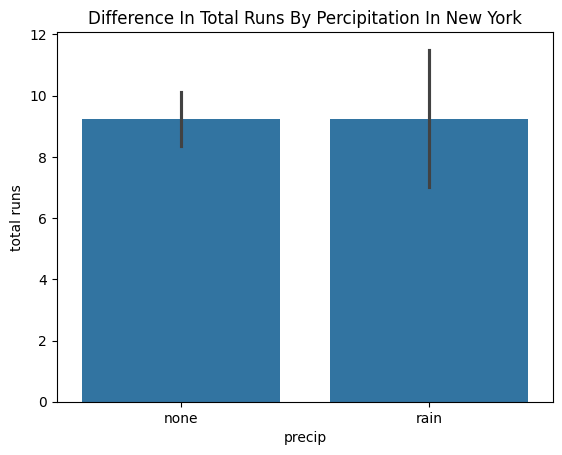

In [131]:
sns.barplot(data = NY_percip, x = "precip", y = "total runs")
plt.title("Difference In Total Runs By Percipitation In New York")

Next we are going to edit our data a little bit for our next visulization

In [132]:
# Creating columns for totals between both teams for each game

mlb['total_hits'] = mlb["HT Hits"] + mlb['VT Hits']
mlb['total_home_runs'] = mlb['VT Home Runs'] + mlb['HT Home Runs']
mlb['total_runs'] = mlb['VT Score'] + mlb['HT Score']

In [133]:
# Finding the average amount for each category and adding the statistics to each park

park_stats = mlb.groupby('Park ID').agg({
    'total_runs': 'mean',
    'total_hits': 'mean',
    'total_home_runs': 'mean',
    'Game Number': 'count'  # total games at each park
}).rename(columns={
    'total_runs': 'Avg Runs',
    'total_hits': 'Avg Hits',
    'total_home_runs': 'Avg HRs',
    'game_id': 'Games Played'
}).reset_index()

park_stats.head()

,Park ID,Avg Runs,Avg Hits,Avg HRs,Game Number
0,ANA01,9.306180,16.359551,2.606742,356
1,ARL03,9.127119,16.347458,2.536723,354
2,ATL03,9.192635,16.623229,2.546742,353
3,BAL12,9.148876,17.047753,2.500000,356
4,BIR01,11.000000,18.000000,2.000000,1


In [134]:
# Creating a threshold that categorizes parks as hitter or pitcher friendly

conditions = [park_stats['Avg Runs'] > 9, park_stats['Avg Runs'] < 8]
choices = ['Hitter-Friendly', 'Pitcher-Friendly']
park_stats['Park Type'] = np.select(conditions, choices, default='Neutral')

**Here we are visualizing the the number of stadiums that are either "Hitter-Friendly", or "Pitcher-Friendly"**

A stadium is considered hitter friendly when a park has a high average runs per game compared to certain standards, in this case we are considering stadiums that average 9 runs or higher to be "Hitter-Friendly" and stadiums that average less than 8 runs per game to be more "Pitcher-Friendly".

As you can see, according to our analysis "Hitter-Friendly" parks are much more common than "Pitcher-Friendly" parks. 

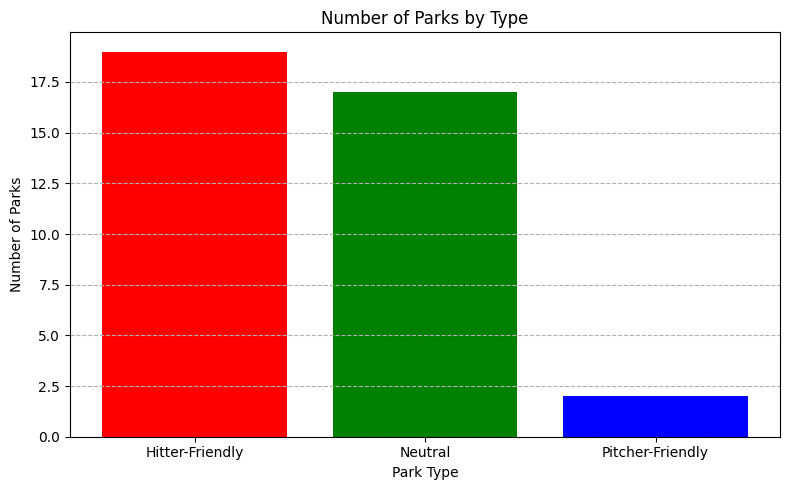

In [135]:
# Count of each Park Type
park_type_counts = park_stats['Park Type'].value_counts().reindex(['Hitter-Friendly', 'Neutral', 'Pitcher-Friendly'], fill_value=0)

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(park_type_counts.index, park_type_counts.values, color=['red', 'green', 'blue'])

plt.title('Number of Parks by Type')
plt.xlabel('Park Type')
plt.ylabel('Number of Parks')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Summary

In the beginning of this project we wanted to look into how different environmental factors like wind, precipitation, and elevation of stadiums impacted the results of MLB baseball games. The reasoning behind our research into this topic, besides a natural curiosity from our interest in the sport, was to see if we could draw any actionable conclusions regarding these external factors players are faced with when playing games.

We addressed these questions and curiosities by looking at how many home runs were hit across all different stadiums. If our data supported the idea that it is easy to hit baseballs farther in higher altitude stadiums we would have seen those stadiums with higher elevations rank towards the top of home run rankings. Our results regarding this measurement came back inconclusive to say the least. Some of the higher elevation ball parks were in fact towards the bottom in terms of home runs hit. Another way that we looked into these environmental factors was looking at the correlation between runs scored against wind speed and precipitation levels. This analysis showed that these factors did not have that significant of an effect on the results of games as most average game scores did not vary greatly across the different groups of wind speed and precipitaion levels. One disctiction that could be drawn however was a decline in runs scored when wind speeds reached a level of 20 mph or greater.

Some limitations with our assesment here is that there are many factors that could play into the home run totals across stadiums. The fact that a lot of these teams vary in skill is one factor. While the Colorado Rockies play in a ball park that is nearly 4000 feet higher in elevation than the next highest park they have been hamstrung by ownership whose primary focus is profit rather than constructing a winning team. This leads to owners not allowing teams to aquire more skilled players in order to reduce payrolls resulting in teams with less skill players. These less skilled players are less likely to in turn hit home runs. Another factor that could affect the data is every stadium has their own unique dimensions. One player could make contact with a ball in Yankee Stadium in New York on one day and have it just creep over the right field wall that stands only 314 feet away from home plate but if they happend to have that same exact swing and same exact contact in Wrigley Field in Chicago the ball would not even reach the warning track with their outfield wall at 353 feet away from home. Another limitation with our wind speed precipitation heatmap was that most baseball games are cancelled once the weather starts to turn bad so there is not a lot of data representation from games played in poorer weather conditions.

In the future I would like to create a way that take all these factors into affect and then map them out to each stadium to see how likely a player is to hit a home run, looking at park dimensions, player skill level, along with the environmental factors we looked at in our analysis. A machine learning model would be perfect for this type of analysis and I'm looking forward to improving upon this project in the future using those types of methods to attain real actionable results.

